# Microsoft Malware Prediction

Team:<br>
Julie Kirkpatrick<br>
Thomas Dolan<br>
Kaggle Team Name:<br>


## Overview of topics covered:
* Data Type Conversion/Loading Data
* Feature Engineering
 * Handling NaNs
 * Fixing Problematic Columns
* Feature Encoding
 * One Hot Encoding
* Modeling
 * Logistic Regression Model
 * K-Nearest Neighbor Model
* Submission

<hr style="height:5px;">

## Step 1) Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
import gc
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

style.use('seaborn')

pd.options.display.max_columns = None

<hr style="height:5px;">

## Step 2) Load Data/Convert Data Types

### Step 2a) Specify Data Types for Faster Loading (see type-determination.ipynb)

In [2]:
data_types = {'MachineIdentifier': 'object',
              'ProductName': 'category',
              'EngineVersion': 'category',
              'AppVersion': 'category',
              'AvSigVersion': 'category',
              'IsBeta': 'float32',
              'RtpStateBitfield': 'float32',
              'IsSxsPassiveMode': 'float32',
              'DefaultBrowsersIdentifier': 'float32',
              'AVProductStatesIdentifier': 'float32',
              'AVProductsInstalled': 'float32',
              'AVProductsEnabled': 'float32',
              'HasTpm': 'float32',
              'CountryIdentifier': 'float32',
              'CityIdentifier': 'float32',
              'OrganizationIdentifier': 'float32',
              'GeoNameIdentifier': 'float32',
              'LocaleEnglishNameIdentifier': 'float32',
              'Platform': 'category',
              'Processor': 'category',
              'OsVer': 'category',
              'OsBuild': 'float32',
              'OsSuite': 'float32',
              'OsPlatformSubRelease': 'category',
              'OsBuildLab': 'category',
              'SkuEdition': 'category',
              'IsProtected': 'float32',
              'AutoSampleOptIn': 'float32',
              'PuaMode': 'category',
              'SMode': 'float32',
              'IeVerIdentifier': 'float32',
              'SmartScreen': 'category',
              'Firewall': 'float32',
              'UacLuaenable': 'float32',
              'Census_MDC2FormFactor': 'category',
              'Census_DeviceFamily': 'category',
              'Census_OEMNameIdentifier': 'float32',
              'Census_OEMModelIdentifier': 'float32',
              'Census_ProcessorCoreCount': 'float32',
              'Census_ProcessorManufacturerIdentifier': 'float32',
              'Census_ProcessorModelIdentifier': 'float32',
              'Census_ProcessorClass': 'category',
              'Census_PrimaryDiskTotalCapacity': 'float32',
              'Census_PrimaryDiskTypeName': 'category',
              'Census_SystemVolumeTotalCapacity': 'float32',
              'Census_HasOpticalDiskDrive': 'float32',
              'Census_TotalPhysicalRAM': 'float32',
              'Census_ChassisTypeName': 'category',
              'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32',
              'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32',
              'Census_InternalPrimaryDisplayResolutionVertical': 'float32',
              'Census_PowerPlatformRoleName': 'category',
              'Census_InternalBatteryType': 'category',
              'Census_InternalBatteryNumberOfCharges': 'float32',
              'Census_OSVersion': 'category',
              'Census_OSArchitecture': 'category',
              'Census_OSBranch': 'category',
              'Census_OSBuildNumber': 'float32',
              'Census_OSBuildRevision': 'float32',
              'Census_OSEdition': 'category',
              'Census_OSSkuName': 'category',
              'Census_OSInstallTypeName': 'category',
              'Census_OSInstallLanguageIdentifier': 'float32',
              'Census_OSUILocaleIdentifier': 'float32',
              'Census_OSWUAutoUpdateOptionsName': 'category',
              'Census_IsPortableOperatingSystem': 'float32',
              'Census_GenuineStateName': 'category',
              'Census_ActivationChannel': 'category',
              'Census_IsFlightingInternal': 'float32',
              'Census_IsFlightsDisabled': 'float32',
              'Census_FlightRing': 'category',
              'Census_ThresholdOptIn': 'float32',
              'Census_FirmwareManufacturerIdentifier': 'float32',
              'Census_FirmwareVersionIdentifier': 'float32',
              'Census_IsSecureBootEnabled': 'float32',
              'Census_IsWIMBootEnabled': 'float32',
              'Census_IsVirtualDevice': 'float32',
              'Census_IsTouchEnabled': 'float32',
              'Census_IsPenCapable': 'float32',
              'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32',
              'Wdft_IsGamer': 'float32',
              'Wdft_RegionIdentifier': 'float32',
              'HasDetections': 'float32'}

### Step 2b) Load Data

In [3]:
df = pd.read_csv('../data/train.csv', dtype=data_types)

In [4]:
df = df.sample(50000)

In [5]:
test = pd.read_csv('../data/test.csv', dtype=data_types)

### Step 2c) Convert any attributes that couldn't be converted in read_csv

In [6]:
bool_columns = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall', 'HasDetections']

unsigned_columns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

In [7]:
def convert_cols_to_bool(df, cols):
    for col in cols:
        df[col] = df[col].astype('bool')

def convert_cols_to_unsigned(df, cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

In [8]:
convert_cols_to_bool(df, bool_columns)
convert_cols_to_unsigned(df, unsigned_columns)

In [9]:
bool_columns = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall']

unsigned_columns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

In [10]:
convert_cols_to_bool(test, bool_columns)
convert_cols_to_unsigned(test, unsigned_columns)

In [11]:
print(df.shape)
print(test.shape)

(50000, 83)
(7853253, 82)


#### Let's check out the final data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4374155 to 8748389
Data columns (total 83 columns):
MachineIdentifier                                    50000 non-null object
ProductName                                          50000 non-null category
EngineVersion                                        50000 non-null category
AppVersion                                           50000 non-null category
AvSigVersion                                         50000 non-null category
IsBeta                                               50000 non-null bool
RtpStateBitfield                                     49818 non-null float32
IsSxsPassiveMode                                     50000 non-null bool
DefaultBrowsersIdentifier                            2497 non-null float32
AVProductStatesIdentifier                            49790 non-null float32
AVProductsInstalled                                  49790 non-null float32
AVProductsEnabled                                  

<hr style="height:5px;">

## Step 3) Dealing with Missing Data

### Step 3a) Drop columns with a lot of missing data

#### First, let's keep a running list of the columns we will be dropping.  We'll use it later on the test set

In [13]:
all_dropped = []

#### Find the columns with lots of missing data

In [14]:
def get_cols_with_many_nans(df, identifier, percentage=0.2):
    """
    Find columns within a dataframe that contain less than x% non-NaN values.

    :param df (DataFrame): A pandas dataframe
    :param identifier (string): Any column with no NaNs, used to compute the threshold (not actually altered)
    :param percentage (float): The lowest amount of non-NaN values you're willing to tolerate.
    :return: (list): Columns that don't meet the minimum number of non-null values.
    """
    result = []
    total_rows = df[identifier].count()
    threshold = int(total_rows * percentage)
    for col in df.columns:
        if df[col].isna().sum() > threshold:
            result.append(col)
    return result

In [15]:
cols_with_many_nans = get_cols_with_many_nans(df, 'MachineIdentifier')

all_dropped += cols_with_many_nans  # Add it to our running list

print("List of columns with a lot of missing values:\n")
print("COLUMN | % MISSING\n")
for col in cols_with_many_nans:
    print(f"{col} | {((df[col].isna().sum() / df['HasDetections'].count()) * 100):2f}%")

List of columns with a lot of missing values:

COLUMN | % MISSING

DefaultBrowsersIdentifier | 95.006000%
OrganizationIdentifier | 31.016000%
PuaMode | 99.978000%
SmartScreen | 35.828000%
Census_ProcessorClass | 99.598000%
Census_InternalBatteryType | 71.022000%
Census_IsFlightingInternal | 82.744000%
Census_ThresholdOptIn | 63.522000%
Census_IsWIMBootEnabled | 63.442000%


#### Drop the columns with lots of missing data

In [16]:
df.drop(cols_with_many_nans, inplace=True, axis=1)

In [17]:
test.drop(cols_with_many_nans, inplace=True, axis=1)

In [18]:
print(df.shape)
print(test.shape)

(50000, 74)
(7853253, 73)


### Step 3b) Fill NaNs in rows

In [21]:
df.isna().sum()

MachineIdentifier                                       0
ProductName                                             0
EngineVersion                                           0
AppVersion                                              0
AvSigVersion                                            0
IsBeta                                                  0
RtpStateBitfield                                      182
IsSxsPassiveMode                                        0
AVProductStatesIdentifier                             210
AVProductsInstalled                                   210
AVProductsEnabled                                     210
HasTpm                                                  0
CountryIdentifier                                       0
CityIdentifier                                       1830
GeoNameIdentifier                                       0
LocaleEnglishNameIdentifier                             0
Platform                                                0
Processor     

In [36]:
def fillna_mean(df, col):
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.add_categories('UNK')
        df[col].fillna('UNK', inplace=True)
    else:
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [37]:
test_cols = []
for col in test.columns:
    if test[col].isna().sum():
        test_cols.append(col)
        
df_cols = []
for col in df.columns:
    if df[col].isna().sum():
        df_cols.append(col)

In [38]:
for col in test_cols:
    fillna_mean(test, col)

for col in df_cols:
    fillna_mean(df, col)

In [41]:
print(df.shape)
print(test.shape)

(50000, 74)
(7853253, 73)


## Step 4) Drop or Fix Potentially Problematic Columns

### Step 4a) Drop columns that have extremely high skew

#### Let's find a programmatic way to detect lopsided columns

In [42]:
def get_cols_with_high_skew(df, identifier, percentage=0.92):
    ret = []
    for col in df.columns:
        highest_amount_category = df[col].value_counts().max()
        total = df[col].count()
        skew = highest_amount_category / total
        if skew > percentage:
            ret.append(col)
    return ret

In [43]:
cols_with_high_skew = get_cols_with_high_skew(df, "HasDectections")

In [44]:
print("Columns with high skew:")
print("COLUMN | % SKEW")
for col in cols_with_high_skew:
    print(f"{col}  |  {(df[col].value_counts().max() / df[col].count()) * 100}%")

Columns with high skew:
COLUMN | % SKEW
ProductName  |  98.964%
IsBeta  |  99.998%
RtpStateBitfield  |  97.044%
IsSxsPassiveMode  |  98.348%
AVProductsEnabled  |  96.962%
HasTpm  |  98.79599999999999%
Platform  |  96.63199999999999%
OsVer  |  96.794%
IsProtected  |  94.624%
AutoSampleOptIn  |  99.988%
SMode  |  93.80199999999999%
Firewall  |  97.85000000000001%
UacLuaenable  |  99.304%
Census_DeviceFamily  |  99.82600000000001%
Census_HasOpticalDiskDrive  |  92.15%
Census_IsPortableOperatingSystem  |  99.946%
Census_IsFlightsDisabled  |  98.182%
Census_FlightRing  |  93.594%
Census_IsVirtualDevice  |  99.11%
Census_IsPenCapable  |  96.27799999999999%
Census_IsAlwaysOnAlwaysConnectedCapable  |  93.508%


In [45]:
all_dropped += cols_with_high_skew  # Add them to our running list

#### And now we drop them

In [46]:
df.drop(cols_with_high_skew, axis=1, inplace=True)

In [47]:
test.drop(cols_with_high_skew, axis=1, inplace=True)

In [48]:
print(df.shape)
print(test.shape)

(50000, 53)
(7853253, 52)


### Step 4b) Reducing Categorical Columns Uniques

#### After dropping rows earlier, we have some unused categories that we can get rid of.

In [49]:
def print_categorical_value_counts(df):
    out = []
    for col in df.columns:
        if col != 'MachineIdentifier' and df[col].dtype.name == 'category':
            out.append((df[col].value_counts().count(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out

In [50]:
out = print_categorical_value_counts(df)
out

[(8531, 'AvSigVersion'),
 (663, 'OsBuildLab'),
 (469, 'Census_OSVersion'),
 (110, 'AppVersion'),
 (70, 'EngineVersion'),
 (53, 'Census_ChassisTypeName'),
 (33, 'Census_OSEdition'),
 (32, 'Census_OSBranch'),
 (30, 'Census_OSSkuName'),
 (13, 'Census_MDC2FormFactor'),
 (10, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (5, 'Census_GenuineStateName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

#### Now we can remove no-longer used categories

In [51]:
for col in out:
    col_name = col[1]
    df[col_name].cat.remove_unused_categories(inplace=True)
    
out = print_categorical_value_counts(df)
out

# We lost a few categories which will help us with our encoding

[(3098, 'AvSigVersion'),
 (312, 'OsBuildLab'),
 (234, 'Census_OSVersion'),
 (72, 'AppVersion'),
 (42, 'EngineVersion'),
 (27, 'Census_ChassisTypeName'),
 (19, 'Census_OSEdition'),
 (18, 'Census_OSSkuName'),
 (14, 'Census_OSBranch'),
 (12, 'Census_MDC2FormFactor'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (8, 'Census_PowerPlatformRoleName'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (4, 'Census_GenuineStateName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

In [52]:
out = print_categorical_value_counts(test)
out

[(9357, 'AvSigVersion'),
 (674, 'OsBuildLab'),
 (475, 'Census_OSVersion'),
 (120, 'AppVersion'),
 (70, 'EngineVersion'),
 (49, 'Census_ChassisTypeName'),
 (37, 'Census_OSEdition'),
 (31, 'Census_OSSkuName'),
 (29, 'Census_OSBranch'),
 (14, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_GenuineStateName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

In [53]:
for col in out:
    col_name = col[1]
    test[col_name].cat.remove_unused_categories(inplace=True)
    
out = print_categorical_value_counts(test)
out

[(9357, 'AvSigVersion'),
 (674, 'OsBuildLab'),
 (475, 'Census_OSVersion'),
 (120, 'AppVersion'),
 (70, 'EngineVersion'),
 (49, 'Census_ChassisTypeName'),
 (37, 'Census_OSEdition'),
 (31, 'Census_OSSkuName'),
 (29, 'Census_OSBranch'),
 (14, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_GenuineStateName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

In [54]:
print(df.shape)
print(test.shape)

(50000, 53)
(7853253, 52)


#### Now let's reduce the number of categories in columns with many unique categories
#### AvSigVersion

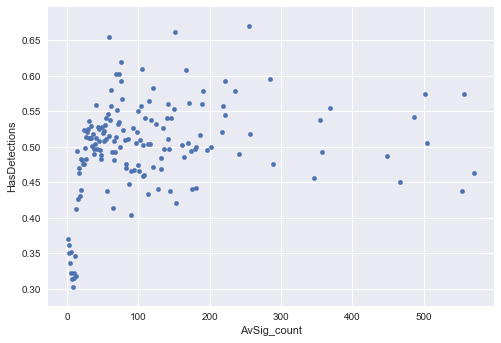

In [55]:
df['AvSig_count'] = df.groupby('AvSigVersion')['AvSigVersion'].transform('count')
test['AvSig_count'] = test.groupby('AvSigVersion')['AvSigVersion'].transform('count')
pd.DataFrame(df.groupby('AvSig_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='AvSig_count', y='HasDetections');

#### No clear groupings when transformed into count, so we will leave it be.

In [56]:
df.drop('AvSigVersion', inplace=True, axis=1)
test.drop('AvSigVersion', inplace=True, axis=1)

#### Let's take a look at our categorical columns now:

In [57]:
out = print_categorical_value_counts(test)
out

[(674, 'OsBuildLab'),
 (475, 'Census_OSVersion'),
 (120, 'AppVersion'),
 (70, 'EngineVersion'),
 (49, 'Census_ChassisTypeName'),
 (37, 'Census_OSEdition'),
 (31, 'Census_OSSkuName'),
 (29, 'Census_OSBranch'),
 (14, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_GenuineStateName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

#### Next up: OsBuildLab

In [58]:
test.OsBuildLab.value_counts()

17134.1.amd64fre.rs4_release.180410-1804                 3628554
16299.15.amd64fre.rs3_release.170928-1534                 731698
15063.0.amd64fre.rs2_release.170317-1834                  570217
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     522601
16299.637.amd64fre.rs3_release_svc.180808-1748            277431
17763.1.amd64fre.rs5_release.180914-1434                  266323
17134.1.x86fre.rs4_release.180410-1804                    264521
14393.2189.amd64fre.rs1_release.180329-1711               163371
10240.17443.amd64fre.th1.170602-2340                      162781
16299.15.x86fre.rs3_release.170928-1534                   132176
10586.1176.amd64fre.th2_release_sec.170913-1848           131801
14393.0.amd64fre.rs1_release.160715-1616                   57739
9600.19153.amd64fre.winblue_ltsb.180908-0600               49398
15063.0.x86fre.rs2_release.170317-1834                     45868
10586.0.amd64fre.th2_release.151029-1700                   32668
14393.2189.x86fre.rs1_rel

#### Let's see how OsBuildLab count correlates with HasDetections

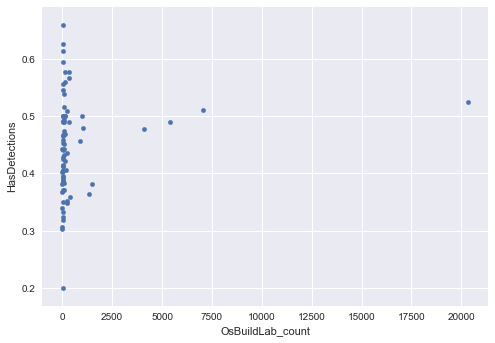

In [59]:
df['OsBuildLab_count'] = df.groupby('OsBuildLab')['OsBuildLab'].transform('count')
pd.DataFrame(df.groupby('OsBuildLab_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='OsBuildLab_count', y='HasDetections');

#### You've served your purpose, OsBuildLab_count.  Now we will drop you.

In [60]:
df.drop('OsBuildLab_count', axis=1, inplace=True)

#### The grouping indicates 4 popular builds and a bunch of others.  Let's split them into categories

In [61]:
def transform_OsBuildLab(x):
    if (df.OsBuildLab == x).sum() / (df.OsBuildLab == x).count() < .05:
        return 'other'
    else:
        return x

In [62]:
df['OsBuildLab_encoded'] = df.OsBuildLab.apply(transform_OsBuildLab)
test['OsBuildLab_encoded'] = test.OsBuildLab.apply(transform_OsBuildLab)

In [63]:
test.OsBuildLab_encoded.value_counts()

17134.1.amd64fre.rs4_release.180410-1804                 3628554
other                                                    2400183
16299.15.amd64fre.rs3_release.170928-1534                 731698
15063.0.amd64fre.rs2_release.170317-1834                  570217
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     522601
Name: OsBuildLab_encoded, dtype: int64

In [64]:
df['OsBuildLab_encoded'] = df['OsBuildLab_encoded'].astype('category')
test['OsBuildLab_encoded'] = test['OsBuildLab_encoded'].astype('category')

In [65]:
df.drop('OsBuildLab', axis=1, inplace=True)
test.drop('OsBuildLab', axis=1, inplace=True)

In [66]:
print(df.shape)
print(test.shape)

(50000, 53)
(7853253, 52)


In [67]:
print_categorical_value_counts(test)

[(475, 'Census_OSVersion'),
 (120, 'AppVersion'),
 (70, 'EngineVersion'),
 (49, 'Census_ChassisTypeName'),
 (37, 'Census_OSEdition'),
 (31, 'Census_OSSkuName'),
 (29, 'Census_OSBranch'),
 (14, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_GenuineStateName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (5, 'OsBuildLab_encoded'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

#### Next up: Census OSVersion

In [68]:
test.Census_OSVersion.value_counts()

10.0.17134.345      1377565
10.0.17134.285       669674
10.0.17134.407       520122
10.0.17134.286       365793
10.0.16299.431       283978
10.0.17134.112       227059
10.0.10240.17443     195916
10.0.16299.371       195793
10.0.14393.2189      191389
10.0.10586.1176      164920
10.0.17134.376       152040
10.0.17134.228       151840
10.0.16299.125       146484
10.0.17134.320       131449
10.0.16299.726       126869
10.0.16299.15        123264
10.0.17134.1         119260
10.0.17763.55        117337
10.0.15063.1387      113180
10.0.16299.309        96775
10.0.17763.134        93335
10.0.16299.611        87497
10.0.16299.547        86075
10.0.16299.492        78985
10.0.15063.1324       75775
10.0.16299.192        71521
10.0.15063.0          68356
10.0.16299.665        63449
10.0.17134.165        57901
10.0.14393.0          56949
                     ...   
10.0.9600.318             1
10.0.14393.1794           1
10.0.14246.1              1
6.3.9600.19182            1
10.0.18204.1001     

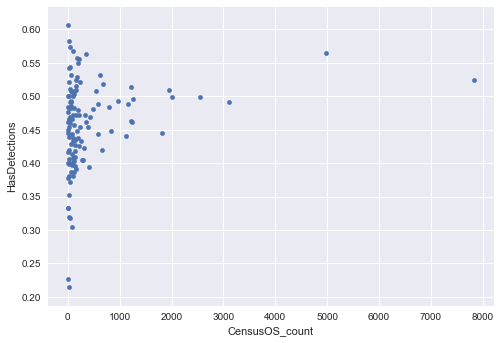

In [69]:
df['CensusOS_count'] = df.groupby('Census_OSVersion')['Census_OSVersion'].transform('count')
pd.DataFrame(df.groupby('CensusOS_count').HasDetections.mean()).reset_index().plot(kind='scatter', x='CensusOS_count', y='HasDetections');

In [70]:
df.drop('CensusOS_count', axis=1, inplace=True)

In [71]:
def transform_CensusOS(x):
    if (df.Census_OSVersion == x).sum() / (df.Census_OSVersion == x).count() < .03:
        return 'other'
    else:
        return x

In [72]:
df['CensusOS_encoded'] = df.Census_OSVersion.apply(transform_CensusOS)
test['CensusOS_encoded'] = test.Census_OSVersion.apply(transform_CensusOS)

In [73]:
test.CensusOS_encoded.value_counts()

other             6180933
10.0.17134.285     669674
10.0.16299.431     283978
10.0.17134.112     227059
10.0.16299.371     195793
10.0.17134.228     151840
10.0.16299.547      86075
10.0.17134.165      57901
Name: CensusOS_encoded, dtype: int64

In [74]:
df['CensusOS_encoded'] = df['CensusOS_encoded'].astype('category')
test['CensusOS_encoded'] = test['CensusOS_encoded'].astype('category')

In [75]:
df.drop('Census_OSVersion', axis=1, inplace=True)
test.drop('Census_OSVersion', axis=1, inplace=True)

In [76]:
print(df.shape)
print(test.shape)

(50000, 53)
(7853253, 52)


In [77]:
print_categorical_value_counts(test)

[(120, 'AppVersion'),
 (70, 'EngineVersion'),
 (49, 'Census_ChassisTypeName'),
 (37, 'Census_OSEdition'),
 (31, 'Census_OSSkuName'),
 (29, 'Census_OSBranch'),
 (14, 'Census_MDC2FormFactor'),
 (11, 'Census_PowerPlatformRoleName'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (8, 'CensusOS_encoded'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_GenuineStateName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_PrimaryDiskTypeName'),
 (5, 'OsBuildLab_encoded'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

#### 120 unique categories is acceptable.  Let's move on!

### 4c) Find Correlated Columns and Drop the Redundant Columns

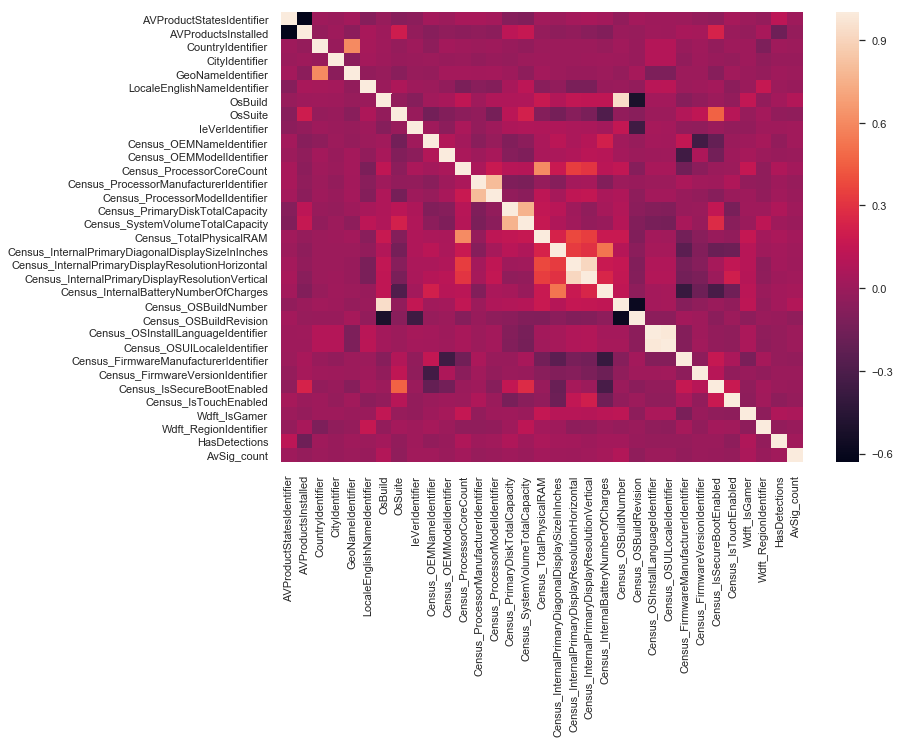

In [78]:
# Let's do this on a smaller sample

df_sample = df.sample(10000)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr());

In [79]:
cols_with_correlations = ['AVProductsInstalled', 'Census_OSBuildRevision', 'Census_OSBuildNumber',
           'Census_FirmwareManufacturerIdentifier', 'Census_OEMNameIdentifier',
           'GeoNameIdentifier', 'Census_ProcessorModelIdentifier',
           'Census_InternalPrimaryDisplayResolutionVertical',
           'Census_OSUILocaleIdentifier', 'Census_TotalPhysicalRAM']

all_dropped += cols_with_correlations

In [80]:
df.drop(cols_with_correlations, axis=1, inplace=True)

In [81]:
test.drop(cols_with_correlations, axis=1, inplace=True)

In [82]:
print(df.shape)
print(test.shape)

(50000, 43)
(7853253, 42)


### 4d) Transform Continuous Columns

#### Let's define some helper functions

In [85]:
def report_ranges(df):
    """
    Gathers the ranges of numeric data in sorted order

    Parameters: Dataframe
    Returns: A list of tuples in the form of (range, column name)
    """
    out = []
    for col in df.columns:
        if not df[col].dtype.name in ['category', 'bool', 'object']:
            out.append((df[col].max() - df[col].min(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out


def discretize(df, col_name, labels, new_name, quantiles=True):
    """
    Turns numeric data into categories, using pd.cut or pd.qcut, makes a new column, drop the old one.
    Prints out the value_count of the new column

    Parameters: Dataframe, column name, list of labels, new column name, quantile boolean
    Returns: None
    """
    bins = len(labels)
    if quantiles:
        df[new_name] = pd.qcut(df[col_name], bins, labels=labels, duplicates='drop')
    else:
        df[new_name] = pd.cut(df[col_name], bins)
    df.drop(col_name, axis=1, inplace=True)


def log_transform(df, col_name):
    """
    Applies a log1p transformation to a column.
    Plots the new data

    Parameters: Dataframe, column name
    Returns: None
    """
    df[col_name] = np.log1p(df[col_name])


def listify(n):
    """
    Provides a list from user inputs

    Parameters: n = number of items in list
    Returns: list of user inputs
    """
    lst = []
    for i in range(n):
        item = input("Enter item: ")
        lst.append(item)
    return lst


def make_decisions_graphs(df):
    """
    Displays graphs of numerical data and allows user to make decisions on data

    Parameters: Dataframe
    Returns: Multidimensional Array with decision information
    """
    ranges = report_ranges(df)
    decisions = []

    for col in ranges:
        col_name = col[1]
        choice = [col_name]
        sns.set(rc={'figure.figsize': (6, 5)})
        sns.distplot(df[col_name])
        plt.show();

        func_to_call = int(input("""What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
        """))

        choice.append(func_to_call)

        if func_to_call == 1:
            type_cut = int(input("""What type of cut?
            1. cut
            2. qcut
            """))
            if type_cut == 1:
                quantiles = False
            else:
                quantiles = True

            n = int(input("How many labels will you use? "))
            labels = listify(n)

            choice += [labels]
            choice.append(col_name + "_CAT")
            choice.append(quantiles)

        decisions.append(choice)
    return (decisions)


def do_decisions(df, decisions):
    """ Applies the decisions from the make_decisions_graph function"

    Parameters: Dataframe, list of decisions from make_decisions_graph function
    Returns: None
    """
    for choice in decisions:
        col_name = choice[0]
        func_to_call = choice[1]

        if func_to_call == 1:
            discretize(df, col_name, choice[2], choice[3], quantiles=choice[4])
        elif func_to_call == 2:
            log_transform(df, col_name)
        elif func_to_call == 3:
            df.drop([col_name], axis=1, inplace=True)


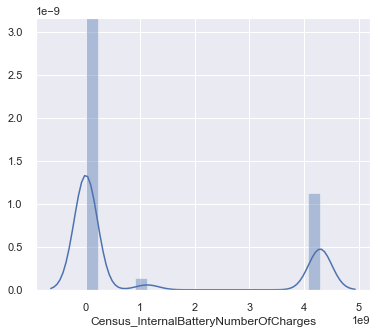

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         1
What type of cut?
            1. cut
            2. qcut
             1
How many labels will you use?  2
Enter item:  1
Enter item:  2


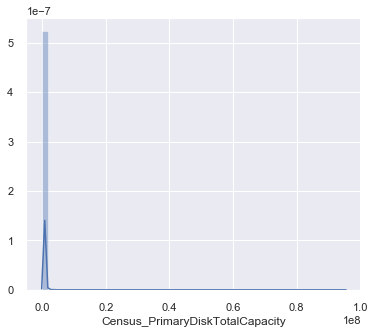

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         3


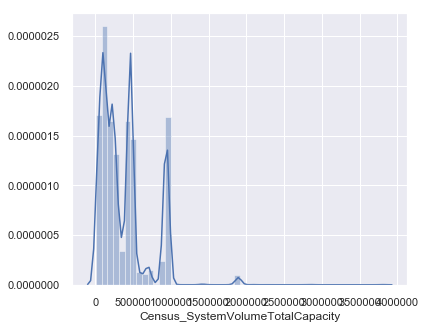

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


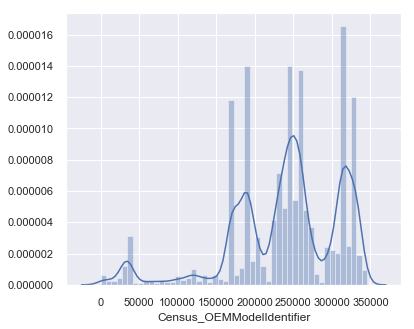

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         1
What type of cut?
            1. cut
            2. qcut
             1
How many labels will you use?  5
Enter item:  1
Enter item:  2
Enter item:  3
Enter item:  4
Enter item:  5


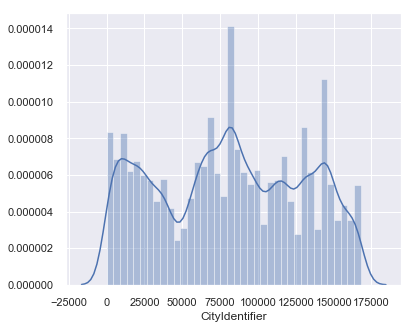

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         4


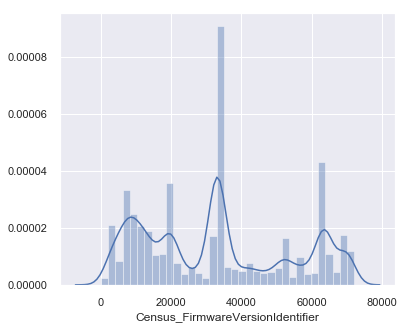

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         4


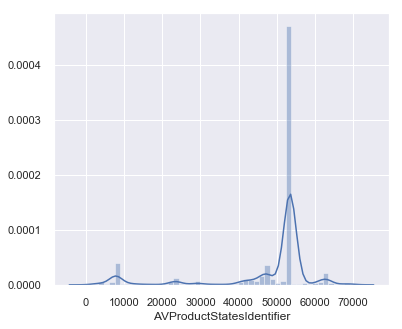

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


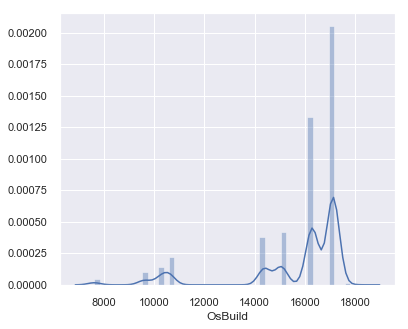

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


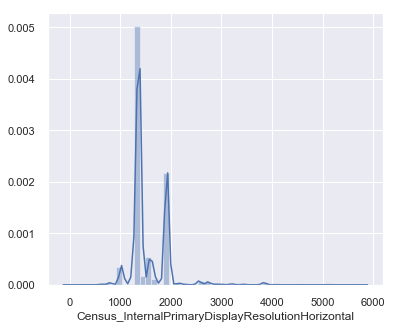

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


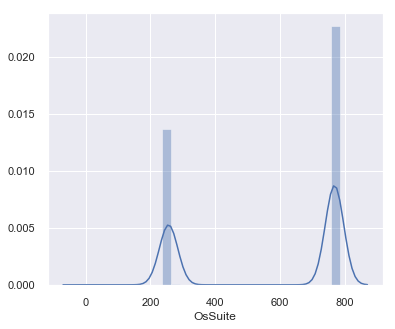

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         1
What type of cut?
            1. cut
            2. qcut
             1
How many labels will you use?  2
Enter item:  1
Enter item:  2


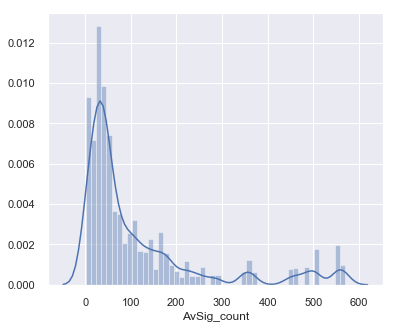

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


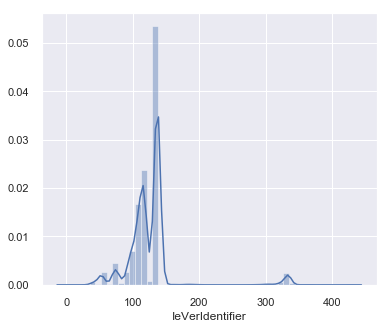

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


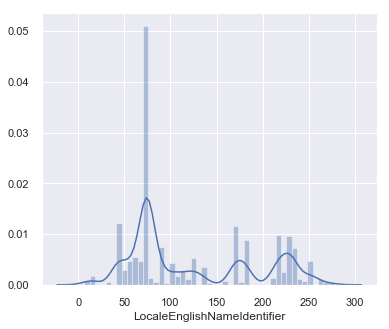

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


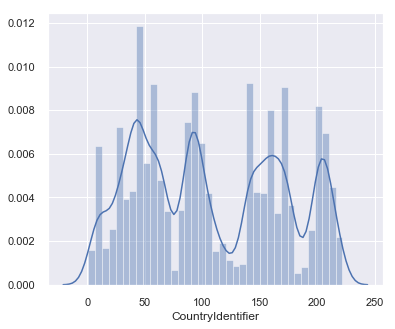

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         4


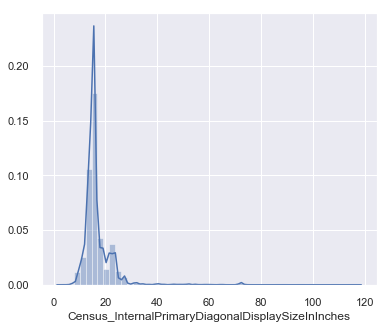

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


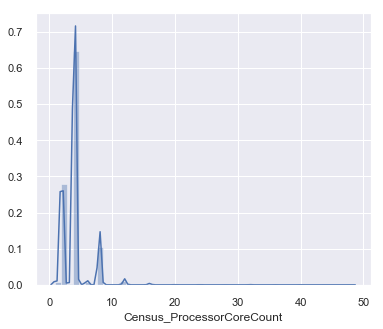

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


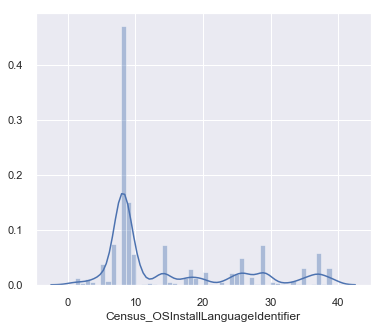

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         2


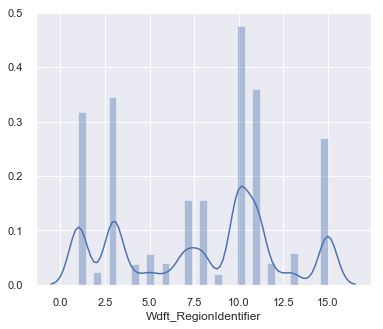

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         4


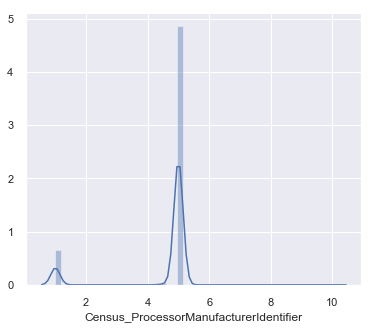

What would you like to do with this data?
        1. Discretize
        2. Log Transform
        3. Drop
        4. Nothing
         4


In [86]:
decisions = make_decisions_graphs(df)

In [87]:
do_decisions(df, decisions)

In [88]:
do_decisions(test, decisions)

In [89]:
print(df.shape)
print(test.shape)

(50000, 42)
(7853253, 41)


#### New distplot for a log-transformed column:

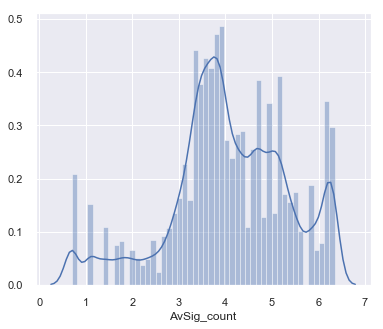

In [90]:
sns.distplot(df['AvSig_count']);

### Step 5) One Hot Encoding

#### Concatenate the train/test dataframes so that the number of columns is the same after one hot encoding

In [108]:
df.reset_index(drop=True, inplace=True)

In [109]:
test_copy = test.copy()
df_copy = df.copy()
target = df_copy.HasDetections
df_copy.drop('HasDetections', axis=1, inplace=True)
bigdata = df_copy.append(test_copy, ignore_index=True)

In [110]:
bigdata.shape

(7903253, 41)

In [111]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7903253 entries, 0 to 7903252
Data columns (total 41 columns):
MachineIdentifier                                    object
EngineVersion                                        object
AppVersion                                           object
AVProductStatesIdentifier                            float32
CountryIdentifier                                    uint8
CityIdentifier                                       float32
LocaleEnglishNameIdentifier                          float32
Processor                                            category
OsBuild                                              float32
OsPlatformSubRelease                                 category
SkuEdition                                           category
IeVerIdentifier                                      float32
Census_MDC2FormFactor                                object
Census_ProcessorCoreCount                            float32
Census_ProcessorManufacturerIdentifi

In [112]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853253 entries, 0 to 7853252
Data columns (total 41 columns):
MachineIdentifier                                    object
EngineVersion                                        category
AppVersion                                           category
AVProductStatesIdentifier                            float32
CountryIdentifier                                    uint8
CityIdentifier                                       float32
LocaleEnglishNameIdentifier                          float32
Processor                                            category
OsBuild                                              float32
OsPlatformSubRelease                                 category
SkuEdition                                           category
IeVerIdentifier                                      float32
Census_MDC2FormFactor                                category
Census_ProcessorCoreCount                            float32
Census_ProcessorManufacturerId

In [113]:
dtypes = test_copy.dtypes.apply(lambda x: x.name).to_dict()

In [114]:
bigdata = bigdata.astype(dtype=dtypes)

In [115]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7903253 entries, 0 to 7903252
Data columns (total 41 columns):
MachineIdentifier                                    object
EngineVersion                                        category
AppVersion                                           category
AVProductStatesIdentifier                            float32
CountryIdentifier                                    uint8
CityIdentifier                                       float32
LocaleEnglishNameIdentifier                          float32
Processor                                            category
OsBuild                                              float32
OsPlatformSubRelease                                 category
SkuEdition                                           category
IeVerIdentifier                                      float32
Census_MDC2FormFactor                                category
Census_ProcessorCoreCount                            float32
Census_ProcessorManufacturerId

In [116]:
categoricals = []
for col in bigdata.columns:
    if bigdata[col].dtype.name == 'category':
        categoricals.append(col)
    
categoricals

['EngineVersion',
 'AppVersion',
 'Processor',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'OsBuildLab_encoded',
 'CensusOS_encoded',
 'Census_InternalBatteryNumberOfCharges_CAT',
 'Census_OEMModelIdentifier_CAT',
 'OsSuite_CAT']

In [117]:
bigdata = pd.get_dummies(bigdata, prefix=categoricals, columns=categoricals)

In [118]:
train = bigdata.iloc[:50000]
test = bigdata.iloc[50000:]

In [119]:
train.tail()

,MachineIdentifier,AVProductStatesIdentifier,CountryIdentifier,CityIdentifier,LocaleEnglishNameIdentifier,OsBuild,IeVerIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_OSInstallLanguageIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,AvSig_count,EngineVersion_1.1.10302.0,EngineVersion_1.1.10401.0,EngineVersion_1.1.11104.0,EngineVersion_1.1.11302.0,EngineVersion_1.1.11400.0,EngineVersion_1.1.11502.0,EngineVersion_1.1.11602.0,EngineVersion_1.1.11701.0,EngineVersion_1.1.11804.0,EngineVersion_1.1.11903.0,EngineVersion_1.1.12002.0,EngineVersion_1.1.12101.0,EngineVersion_1.1.12205.0,EngineVersion_1.1.12300.0,EngineVersion_1.1.12400.0,EngineVersion_1.1.12505.0,EngineVersion_1.1.12603.0,EngineVersion_1.1.12706.0,EngineVersion_1.1.12804.0,EngineVersion_1.1.12805.0,EngineVersion_1.1.12902.0,EngineVersion_1.1.13000.0,EngineVersion_1.1.13102.0,EngineVersion_1.1.13103.0,EngineVersion_1.1.13202.0,EngineVersion_1.1.13303.0,EngineVersion_1.1.13406.0,EngineVersion_1.1.13407.0,EngineVersion_1.1.13503.0,EngineVersion_1.1.13504.0,EngineVersion_1.1.13601.0,EngineVersion_1.1.13701.0,EngineVersion_1.1.13704.0,EngineVersion_1.1.13802.0,EngineVersion_1.1.13803.0,EngineVersion_1.1.13804.0,EngineVersion_1.1.13902.0,EngineVersion_1.1.13903.0,EngineVersion_1.1.14001.0,EngineVersion_1.1.14002.0,EngineVersion_1.1.14003.0,EngineVersion_1.1.14102.0,EngineVersion_1.1.14103.0,EngineVersion_1.1.14104.0,EngineVersion_1.1.14201.0,EngineVersion_1.1.14202.0,EngineVersion_1.1.14303.0,EngineVersion_1.1.14305.0,EngineVersion_1.1.14306.0,EngineVersion_1.1.14405.2,EngineVersion_1.1.14500.2,EngineVersion_1.1.14500.5,EngineVersion_1.1.14600.4,EngineVersion_1.1.14700.3,EngineVersion_1.1.14700.4,EngineVersion_1.1.14700.5,EngineVersion_1.1.14800.1,EngineVersion_1.1.14800.3,EngineVersion_1.1.14901.3,EngineVersion_1.1.14901.4,EngineVersion_1.1.15000.1,EngineVersion_1.1.15000.2,EngineVersion_1.1.15100.1,EngineVersion_1.1.15200.1,EngineVersion_1.1.15300.5,EngineVersion_1.1.15300.6,EngineVersion_1.1.15400.3,EngineVersion_1.1.15400.4,EngineVersion_1.1.15400.5,EngineVersion_1.1.9700.0,AppVersion_4.10.14393.0,AppVersion_4.10.14393.1066,AppVersion_4.10.14393.1198,AppVersion_4.10.14393.1532,AppVersion_4.10.14393.1593,AppVersion_4.10.14393.1613,AppVersion_4.10.14393.1794,AppVersion_4.10.14393.2248,AppVersion_4.10.14393.2273,AppVersion_4.10.14393.2457,AppVersion_4.10.14393.2608,AppVersion_4.10.14393.726,AppVersion_4.10.14393.953,AppVersion_4.10.205.0,AppVersion_4.10.207.0,AppVersion_4.10.209.0,AppVersion_4.11.15063.0,AppVersion_4.11.15063.1154,AppVersion_4.11.15063.1155,AppVersion_4.11.15063.447,AppVersion_4.11.15063.994,AppVersion_4.12.16299.0,AppVersion_4.12.16299.15,AppVersion_4.12.17007.17121,AppVersion_4.12.17007.17123,AppVersion_4.12.17007.18011,AppVersion_4.12.17007.18021,AppVersion_4.12.17007.18022,AppVersion_4.13.17133.1,AppVersion_4.13.17134.1,AppVersion_4.13.17134.112,AppVersion_4.13.17134.191,AppVersion_4.13.17134.228,AppVersion_4.13.17134.319,AppVersion_4.13.17134.320,AppVersion_4.13.17604.1000,AppVersion_4.13.17618.1000,AppVersion_4.13.17623.1002,AppVersion_4.13.17627.1000,AppVersion_4.13.17634.1000,AppVersion_4.13.17639.1000,AppVersion_4.14.17613.18038,AppVersion_4.14.17613.18039,AppVersion_4.14.17639.18041,AppVersion_4.15.17643.1000,AppVersion_4.15.17650.1001,AppVersion_4.15.17655.1000,AppVersion_4.15.17661.1001,AppVersion_4.15.17666.1000,AppVersion_4.16.17656.18051,AppVersion_4.16.17656.18052,AppVersion_4.17.17672.1000,AppVersion_4.17.17677.1000,AppVersion_4.17.17682.1000,AppVersion_4.17.17685.20082,AppVersion_4.17.17686.1003,AppVersion_4.18.1806.18062,AppVersion_4.18.1806.20015,AppVersion_4.18.1806.20021,AppVersion_4.18.1806.20033,AppVersion_4.18.1807.18070,AppVersion_4.18.1807.18072,AppVersion_4.18.1807.18075,AppVersion_4.18.18

In [120]:
print(train.shape)
print(test.shape)
print(target.shape)

(50000, 462)
(7853253, 462)
(50000,)


### Step 6) Modeling

In [121]:
train_id = train.MachineIdentifier
train.drop('MachineIdentifier', axis=1, inplace=True)
test_id = test.MachineIdentifier
test.drop('MachineIdentifier', axis=1, inplace=True)

#### Side step: downcast float64 'AvSigValue' and drop a column with infinite values

In [125]:
train['AvSig_count'] = pd.to_numeric(train['AvSig_count'], downcast='float')
test['AvSig_count'] = pd.to_numeric(test['AvSig_count'], downcast='float')

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 461 entries, AVProductStatesIdentifier to OsSuite_CAT_(400.0, 784.0]
dtypes: bool(3), float32(14), uint8(444)
memory usage: 24.0 MB


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 461 entries, AVProductStatesIdentifier to OsSuite_CAT_(400.0, 784.0]
dtypes: bool(3), float32(14), uint8(444)
memory usage: 24.0 MB


In [139]:
for col in train.columns:
    if train[col].dtype.name not in ['category', 'bool']:
        if not np.all(np.isfinite(train[col])):
            print(col)

Census_InternalPrimaryDisplayResolutionHorizontal


In [141]:
for col in test.columns:
    if test[col].dtype.name not in ['category', 'bool']:
        if not np.all(np.isfinite(test[col])):
            print(col)

Census_InternalPrimaryDisplayResolutionHorizontal


In [142]:
train.drop('Census_InternalPrimaryDisplayResolutionHorizontal', axis=1, inplace=True)
test.drop('Census_InternalPrimaryDisplayResolutionHorizontal', axis=1, inplace=True)

#### Modeling time.

In [145]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_model = lr.fit(train, target)

In [146]:
lr_model.score(train, target)

0.50748

In [149]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=2)
kn_model = kn.fit(train, target)
kn_model.score(train, target)

0.75634

We ran this on two separate classifiers that we used in our homeworks.  The logistic regression model performed only slightly better than if we had randomly guessed the outcomes.  However, the K Nearest Neighbors classifier performed much better.  However, there is a good chance that we are overfitting our data.  Also, we could have used more samples in our training set (we only used about 1% of the total training data available).  However, we wanted to create a model that would run in a reasonable amount of time.

In [151]:
yhat_p = kn_model.predict_proba(test)

In [ ]:
submissionKN = pd.DataFrame({'MachineIdentifier': test_id,
                           'HasDetections': yhat_p[:]}) # Create a submission DataFrame w/ just P.I.D and 'Survived'
submissionKN.to_csv('../submissions/MalwareSubmissionsKN.csv', index=False) # Export to csv!

In [108]:
# tune model
# submit to kaggle
# Do summary
# do video
# add link to report
# Submit